# 正则化

欢迎来到本周的第二次作业。 
深度学习模型具有很高的灵活性和能力，如果训练数据集不够大，**将会造成一个严重的问题--过拟合**。尽管它在训练集上效果很好，但是学到的网络**不能应用到测试集中！**

**你将学习：** 在深度学习模型中使用正则化。

首先导入要使用的包。

In [1]:
cd ../data/L2W1

G:\deep learning\deeplearning.ai\data\L2W1


In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

G:\deep learning\deeplearning.ai\data\L2W1\reg_utils.py:85: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
G:\deep learning\deeplearning.ai\data\L2W1\reg_utils.py:86: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


**问题陈述**：你刚刚被法国足球公司聘为AI专家。他们希望你推荐预测法国守门员将球踢出的位置，以便法国队的球员可以用头将球击中。

![Image Name](../image/L2W1/1.png)

**图1**：
**足球场**
守门员将球踢到空中，每支球队的球员都在尽力用头击球


他们为你提供了法国过去10场比赛的二维数据集。

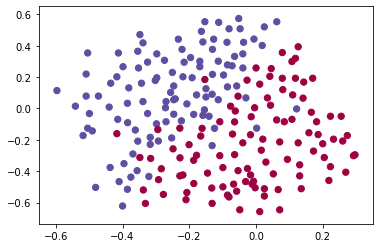

In [3]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

数据中每个点对应于足球场上的位置，在该位置上，法国守门员从足球场左侧射出球后，足球运动员用他/她的头部击中了球。
- 如果圆点为蓝色，则表示法国球员设法用头部将球击中
- 如果圆点为红色，则表示另一支球队的球员用头撞球

**你的目标**：运用深度学习模型预测守门员应将球踢到球场上的位置。

**数据集分析**：该数据集含有噪声，但看起来一条将左上半部分（蓝色）与右下半部分（红色）分开的对角线会很比较有效。

你将首先尝试非正则化模型。然后学习如何对其进行正则化，并决定选择哪种模型来解决法国足球公司的问题。

## 1 非正则化模型

你将使用以下神经网络（已为你实现），可以如下使用此模型：
- 在*regularization mode*中，通过`lambd`将输入设置为非零值。我们使用`lambd`代替`lambda`，因为`lambda`是Python中的保留关键字。
- 在*dropout mode*中，将`keep_prob`设置为小于1的值

首先，你将尝试不进行任何正则化的模型。然后，你将实现：
- *L2 正则化* 函数：`compute_cost_with_regularization()`和`backward_propagation_with_regularization()`
- *Dropout* 函数：`forward_propagation_with_dropout()`和`backward_propagation_with_dropout()`

在每个部分中，你都将使用正确的输入来运行此模型，以便它调用已实现的函数。查看以下代码以熟悉该模型。

In [4]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

让我们在不进行任何正则化的情况下训练模型，并观察训练/测试集的准确性。

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.1632998752572419
Cost after iteration 20000: 0.13851642423239133


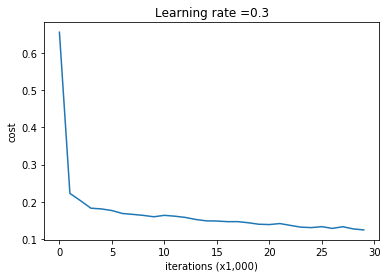

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [5]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

训练精度为94.8％，而测试精度为91.5％。这是**基准模型**的表现（你将观察到正则化对该模型的影响）。运行以下代码以绘制模型的决策边界。

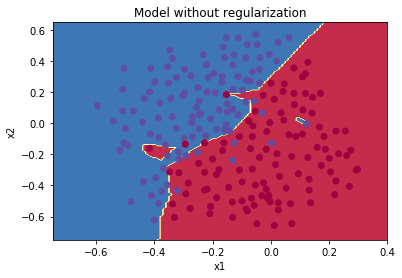

In [6]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

非正则化模型显然过度拟合了训练集，拟合了一些噪声点！现在让我们看一下减少过拟合的两种手段。

## 2 L2正则化

避免过拟合的标准方法称为 **L2正则化**，它将损失函数从：
$$
J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}
$$
修改到：
$$
J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}
$$

让我们修改损失并观察结果。

**练习**：实现`compute_cost_with_regularization（）`，以计算公式（2）的损失。要计算$\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$ ，请使用：
```python
np.sum(np.square(Wl))
```
请注意，你必须对$W^{[1]}$，$W^{[2]}$和$W^{[3]}$执行此操作，然后将三个项相加并乘以$\frac{1}{m}\frac{\lambda}{2}$。

In [7]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = (1./m*lambd/2)*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    ### END CODER HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [8]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

cost = 1.7864859451590758


**预期输出**: 
cost = 1.7864859451590758

当然，因为你更改了损失，所以还必须更改反向传播！ 必须针对新损失函数计算所有梯度。

**练习**：实现正则化后的反向传播。更改仅涉及dW1，dW2和dW3。对于每一个，你必须添加正则化项的梯度($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$)。

In [9]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.

    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar

    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y

    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m * W3
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m * W2
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m * W1
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

In [10]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)
print ("dW1 = "+ str(grads["dW1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("dW3 = "+ str(grads["dW3"]))

dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]


**预期输出**:
dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]

现在让我们使用L2正则化$(\lambda = 0.7)$运行的模型。`model（）`函数将调用：
- `compute_cost_with_regularization`代替`compute_cost`
- `backward_propagation_with_regularization`代替`backward_propagation`

Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


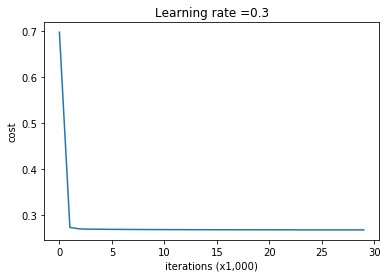

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [11]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Nice！测试集的准确性提高到93％。你成功拯救了法国足球队！

模型不再过拟合训练数据了。让我们绘制决策边界看一下。

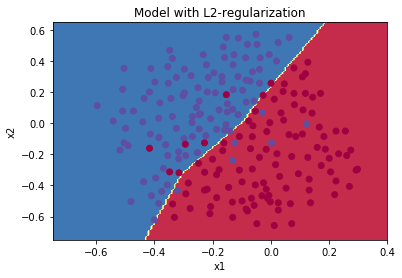

In [12]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**观察**：
- $\lambda$ 的值是你可以调整开发集的超参数。
- L2正则化使决策边界更平滑。如果$\lambda$ 太大，则也可能“过度平滑”，从而使模型偏差较高。

**L2正则化的原理**：

L2正则化基于以下假设：权重较小的模型比权重较大的模型更简单。因此，通过对损失函数中权重的平方值进行惩罚，可以将所有权重驱动为较小的值。比重太大会使损失过高！这将导致模型更平滑，输出随着输入的变化而变化得更慢。

**你应该记住** L2正则化的影响：
- 损失计算：
    - 正则化条件会添加到损失函数中
- 反向传播函数：
    - 有关权重矩阵的渐变中还有其他术语
- 权重最终变小（“权重衰减”）：
    - 权重被推到较小的值。

## 3 Dropout

最后，**Dropout**是广泛用于深度学习的正则化技术。
**它会在每次迭代中随机关闭一些神经元。** 
观看这两个video，看看这它是什么意思！

```
要了解Dropout，可以思考与朋友进行以下对话：
- 朋友：“为什么你需要所有神经元来训练你的网络以分类图像？”。
- 你：“因为每个神经元都有权重，并且可以学习图像的特定特征/细节/形状。我拥有的神经元越多，模型学习的特征就越丰富！”
- 朋友：“我知道了，但是你确定你的神经元学习的是不同的特征而不是全部相同的特征吗？”
- 你：“这是个好问题……同一层中的神经元实际上并不关联。应该绝对有可能让他们学习相同的图像特征/形状/形式/细节...这是多余的。为此应该有一个解决方案。”
```


![Image Name](../image/L2W1/2.gif)

图2：Dropout第二个隐藏层。
在每次迭代中，你以概率$1 - keep\_prob$或以概率$keep\_prob$（此处为50％）关闭此层的每个神经元。关闭的神经元对迭代的正向和反向传播均无助于训练。

![Image Name](../image/L2W1/3.gif)

图3：Dropout第一和第三隐藏层。
$1^{st}$层：我们平均关闭了40％的神经元。$3^{rd}$ 层：我们平均关闭了20％的神经元。

当你关闭某些神经元时，实际上是在修改模型。Dropout背后的想法是，在每次迭代中，你将训练仅使用神经元子集的不同模型。通过Dropout，你的神经元对另一种特定神经元的激活变得不那么敏感，因为另一神经元可能随时关闭。

### 3.1 带有Dropout的正向传播

**练习**：实现带有Dropout的正向传播。你正在使用3层的神经网络，并将为第一和第二隐藏层添加Dropout。我们不会将Dropout应用于输入层或输出层。

**说明**：
关闭第一层和第二层中的某些神经元。为此，将执行4个步骤：
1. 在讲座中，我们讨论了使用`np.random.rand（）`创建与$a^{[1]}$形状相同的变量$d^{[1]}$的方法，以随机获取0到1之间的数。在这里，你将使用向量化的实现，创建一个与$A^{[1]}$的矩阵维度相同的随机矩阵$D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $。 
2. 通过对$D^{[1]}$中的值进行阈值设置，将$D^{[1]}$的每个条目设置为0（概率为`1-keep_prob`）或1（概率为`keep_prob`）。提示：将矩阵X的所有条目设置为0（如果概率小于0.5）或1（如果概率大于0.5），则可以执行：`X = (X < 0.5)`。注意0和1分别对应False和True。
3. 将$A^{[1]}$设置为$A^{[1]} * D^{[1]}$（关闭一些神经元）。你可以将$D^{[1]}$ 视为掩码，这样当它与另一个矩阵相乘时，关闭某些值。
4. 将$A^{[1]}$除以`keep_prob`。通过这样做，你可以确保损失结果仍具有与dropout相同的期望值。（此技术也称为反向dropout）

In [13]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])                                         # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = D1 < keep_prob                                      # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1 * D1                                         # Step 3: shut down some neurons of A1
    A1 = A1 / keep_prob                                        # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])                                         # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = D2 < keep_prob                                         # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2 * D2                                         # Step 3: shut down some neurons of A2
    A2 = A2 / keep_prob                                      # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

In [14]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, keep_prob = 0.7)
print ("A3 = " + str(A3))

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


**预期输出**: 
A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]

### 3.2 带有dropout的反向传播

**练习**：实现带有dropout的反向传播。和之前一样，训练一个3层的网络。使用存储在缓存中的掩码$D^{[1]}$和$D^{[2]}$，添加dropout到第一和第二个隐藏层。

**说明**：
带有dropout的反向传播实现上非常容易。你将必须执行2个步骤：
1.你先前通过在`A1`上应用掩码$D^{[1]}$来关闭正向传播过程中的某些神经元。在反向传播中，你将必须将相同的掩码$D^{[1]}$重新应用于`dA1`来关闭相同的神经元。
2.在正向传播过程中，你已将`A1`除以`keep_prob`。 因此，在反向传播中，必须再次将`dA1`除以`keep_prob`（计算的解释是，如果$A^{[1]}$被`keep_prob`缩放，则其派生的$dA^{[1]}$也由相同的`keep_prob`缩放）。


In [15]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:

    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = dA2 * D2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2 / keep_prob           # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = dA1 * D1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1 / keep_prob             # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [16]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, keep_prob = 0.8)

print ("dA1 = " + str(gradients["dA1"]))
print ("dA2 = " + str(gradients["dA2"]))

dA1 = [[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = [[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


**预期输出**: 
dA1 = [[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = [[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]

现在让我们使用dropout（`keep_prob = 0.86`）运行模型。 这意味着在每次迭代中，你都以24％的概率关闭第1层和第2层的每个神经元。 函数`model()`将调用：
- `forward_propagation_with_dropout`而不是`forward_propagation`。
- `backward_propagation_with_dropout`，而不是`backward_propagation`。

Cost after iteration 0: 0.6543912405149825


G:\deep learning\deeplearning.ai\data\L2W1\reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
G:\deep learning\deeplearning.ai\data\L2W1\reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


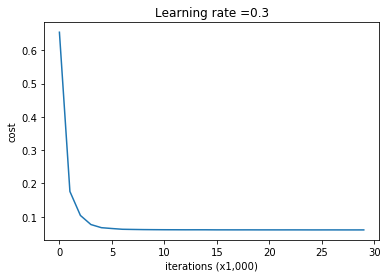

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [22]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Dropout效果很好！测试精度再次提高（达到95％）！模型并未过拟合训练集，并且在测试集上表现很好。法国足球队将永远感激你！

运行以下代码以绘制决策边界。

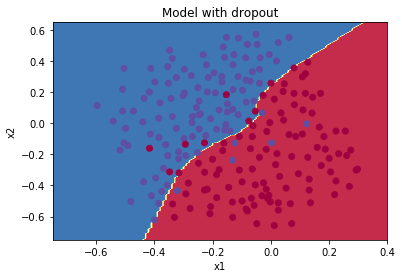

In [23]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

  
**注意**：
- 使用dropout时的**常见错误**是在训练和测试中都使用。你只能在训练中使用dropout（随机删除节点）。
- 深度学习框架，例如[tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/dropout), [PaddlePaddle](http://doc.paddlepaddle.org/release_doc/0.9.0/doc/ui/api/trainer_config_helpers/attrs.html), [keras](https://keras.io/layers/core/#dropout)或者 [caffe](http://caffe.berkeleyvision.org/tutorial/layers/dropout.html) 附带dropout层的实现。不需强调-相信你很快就会学习到其中的一些框架。

**关dropout你应该记住的事情：**
- dropout是一种正则化技术。
- 仅在训练期间使用dropout，在测试期间不要使用。
- 在正向和反向传播期间均应用dropout。
- 在训练期间，将每个dropout层除以keep_prob，以保持激活的期望值相同。例如，如果keep_prob为0.5，则平均而言，我们将关闭一半的节点，因此输出将按0.5缩放，因为只有剩余的一半对解决方案有所贡献。除以0.5等于乘以2，因此输出现在具有相同的期望值。你可以检查此方法是否有效，即使keep_prob的值不是0.5。

## 4 结论

**这是我们三个模型的结果**：

| 模型| 训练精度| 测试精度
| --------------------------------- | -------------- | ------------- |
| 三层神经网络，无正则化 |95％| 91.50％|
| 具有L2正则化的3层NN | 94％| 93％|
| 具有dropout的3层NN | 93％| 95％|

请注意，正则化会损害训练集的性能！ 这是因为它限制了网络过拟合训练集的能力。 但是，由于它最终可以提供更好的测试准确性，因此可以为你的系统提供帮助。

恭喜你完成此作业！ 同时也帮助了法国足球。 :-)

**我们希望你从此笔记本中记住的内容**：
- 正则化将帮助减少过拟合。
- 正则化将使权重降低到较低的值。
- L2正则化和Dropout是两种非常有效的正则化技术。